<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autoregression-modelling-of-Time-series-for-Outlier-detection" data-toc-modified-id="Autoregression-modelling-of-Time-series-for-Outlier-detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autoregression modelling of Time series for Outlier detection</a></span></li><li><span><a href="#Persistence-Model" data-toc-modified-id="Persistence-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Persistence Model</a></span></li><li><span><a href="#AutoRegression-model" data-toc-modified-id="AutoRegression-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AutoRegression model</a></span><ul class="toc-item"><li><span><a href="#Auto-Correlation-at-lag-=-k" data-toc-modified-id="Auto-Correlation-at-lag-=-k-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Auto Correlation at lag = k</a></span></li></ul></li><li><span><a href="#Get-all-anomalies" data-toc-modified-id="Get-all-anomalies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get all anomalies</a></span></li><li><span><a href="#Using-AR-to-model-whole-TS" data-toc-modified-id="Using-AR-to-model-whole-TS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using AR to model whole TS</a></span></li><li><span><a href="#Define-threshold" data-toc-modified-id="Define-threshold-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define threshold</a></span></li><li><span><a href="#See-if-AR-model-+-threshold-=-Anomalies" data-toc-modified-id="See-if-AR-model-+-threshold-=-Anomalies-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>See if AR model + threshold = Anomalies</a></span></li><li><span><a href="#Stationarize-Time-Series-acc-to-Seasonality" data-toc-modified-id="Stationarize-Time-Series-acc-to-Seasonality-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Stationarize Time Series acc to Seasonality</a></span></li><li><span><a href="#Retrain-AutoReg-on-Stationary-TS" data-toc-modified-id="Retrain-AutoReg-on-Stationary-TS-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Retrain AutoReg on Stationary TS</a></span></li><li><span><a href="#Test-Stationarity-using-the-Augmented-Dicky-Fuller-Test" data-toc-modified-id="Test-Stationarity-using-the-Augmented-Dicky-Fuller-Test-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Test Stationarity using the Augmented Dicky Fuller Test</a></span></li><li><span><a href="#Anomaly-Detection-with-the-differenced-AR-model" data-toc-modified-id="Anomaly-Detection-with-the-differenced-AR-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Anomaly Detection with the differenced AR model</a></span></li><li><span><a href="#Calculate-F1-score" data-toc-modified-id="Calculate-F1-score-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Calculate F1 score</a></span></li><li><span><a href="#Doing-this-in-a-loop" data-toc-modified-id="Doing-this-in-a-loop-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Doing this in a loop</a></span></li><li><span><a href="#Loop-with-Standardized-data" data-toc-modified-id="Loop-with-Standardized-data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Loop with Standardized data</a></span></li><li><span><a href="#Fixing-performance" data-toc-modified-id="Fixing-performance-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Fixing performance</a></span></li><li><span><a href="#Fixing-Performance-with-standardization" data-toc-modified-id="Fixing-Performance-with-standardization-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Fixing Performance with standardization</a></span></li></ul></div>

# Autoregression modelling of Time series for Outlier detection 
By Sanket Mehrotra

Source Ref: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

A regression model provides an output based on a linear combination of input values
$$
\hat{y} = b_0 + b_1*X_1
$$

an AR model assumes autocorrelation

The stronger the correlation between the output variable and a specific lagged variable, the **more weight** that autoregression model can put on that variable when modeling.

In [1]:
import os
os.getcwd()

'D:\\Temp\\time-series\\code'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt 
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')

print(series.head())

    timestamp       value  is_anomaly
0  1416726000   13.894031           0
1  1416729600   33.578274           0
2  1416733200   88.933746           0
3  1416736800  125.389424           0
4  1416740400  152.962000           0


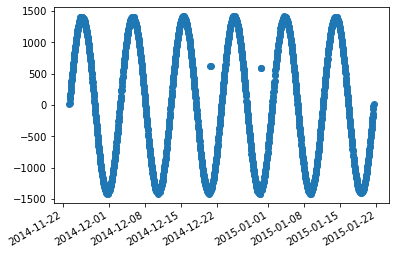

In [4]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(series['timestamp'],series['value'])
plt.gcf().autofmt_xdate()

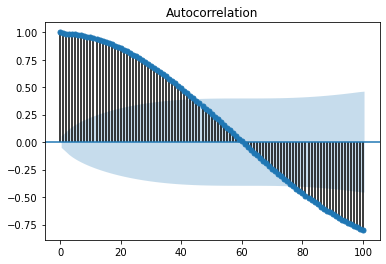

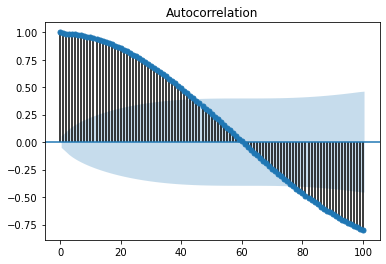

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
#series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')
plot_acf(series['value'], lags=100)
#plt.clf()

In [6]:
df_indexed = series.copy().set_index('timestamp')

In [7]:
# create lagged dataset
values = pd.DataFrame(series.value)
lagged_df = pd.concat([values.shift(1),values],axis =1)
print("df\n",lagged_df.head())
lagged_df.columns = ['t-1','t']
result = lagged_df.corr()
print("Correlation Matrix Result for lag = 1: ", "\n" ,result)


df
         value       value
0         NaN   13.894031
1   13.894031   33.578274
2   33.578274   88.933746
3   88.933746  125.389424
4  125.389424  152.962000
Correlation Matrix Result for lag = 1:  
           t-1         t
t-1  1.000000  0.993903
t    0.993903  1.000000


In [8]:
# split into train and test sets
X = lagged_df.values
print("X","\n",X)
train, test = X[1:len(X)-7], X[len(X)-7:]
print("\ntrain\n",train,"\ntest\n",test)
train_X, train_y = train[:,0], train[:,1]
print("\ntrainX\n",train_X,"\ntrain_y\n",train_y)
test_X, test_y = test[:,0], test[:,1]
print("\ntestX\n",test_X,"\ntest_y\n",test_y)

X 
 [[          nan   13.8940312 ]
 [  13.8940312    33.57827355]
 [  33.57827355   88.93374618]
 ...
 [-139.65783427  -70.55065181]
 [ -70.55065181  -16.85714756]
 [ -16.85714756    7.75765952]]

train
 [[  13.8940312    33.57827355]
 [  33.57827355   88.93374618]
 [  88.93374618  125.3894237 ]
 ...
 [-378.74044506 -340.50852173]
 [-340.50852173 -292.65126129]
 [-292.65126129 -251.27630666]] 
test
 [[-251.27630666 -201.52864723]
 [-201.52864723 -187.47196836]
 [-187.47196836 -141.4197665 ]
 [-141.4197665  -139.65783427]
 [-139.65783427  -70.55065181]
 [ -70.55065181  -16.85714756]
 [ -16.85714756    7.75765952]]

trainX
 [  13.8940312    33.57827355   88.93374618 ... -378.74044506 -340.50852173
 -292.65126129] 
train_y
 [  33.57827355   88.93374618  125.3894237  ... -340.50852173 -292.65126129
 -251.27630666]

testX
 [-251.27630666 -201.52864723 -187.47196836 -141.4197665  -139.65783427
  -70.55065181  -16.85714756] 
test_y
 [-201.52864723 -187.47196836 -141.4197665  -139.65783427  -7

# Persistence Model

Test MSE: 1865.859


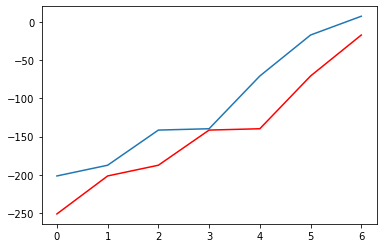

In [9]:
#Persistence Model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
fig1 = plt.figure()
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

# AutoRegression model

In [10]:
from statsmodels.tsa.ar_model import AutoReg

#Load the series
#series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')
series = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M2.csv')

In [11]:
# split dataset
X = series.value
train, test = X[1:len(X)-20], X[len(X)-20:]

In [12]:
# train autoregression
model = AutoReg(train, lags=31)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    3.294900
value.L1     1.008510
value.L2    -0.304777
value.L3     0.309467
value.L4    -0.083403
value.L5     0.082144
value.L6    -0.013783
value.L7     0.022325
value.L8    -0.003608
value.L9    -0.001827
value.L10    0.014466
value.L11   -0.008859
value.L12    0.002838
value.L13   -0.003872
value.L14    0.002262
value.L15   -0.004177
value.L16    0.005071
value.L17   -0.002992
value.L18    0.000431
value.L19    0.005712
value.L20   -0.008017
value.L21    0.003559
value.L22    0.002808
value.L23   -0.005515
value.L24   -0.002591
value.L25    0.005358
value.L26   -0.003214
value.L27   -0.003940
value.L28    0.001268
value.L29   -0.009003
value.L30   -0.004923
value.L31   -0.020971
dtype: float64


In [13]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions = predictions.replace(np.nan,0)
for i in range(len(predictions)):
 	print('predicted=%f, expected=%f' % (predictions.iloc[i], test.iloc[i]))


predicted=1225.164109, expected=1235.675464
predicted=1207.872002, expected=1214.292346
predicted=1188.810310, expected=1203.992032
predicted=1169.979917, expected=1193.921030
predicted=1150.827075, expected=1175.248490
predicted=1131.802930, expected=1140.133179
predicted=1111.390399, expected=1107.399957
predicted=1091.264759, expected=1105.250352
predicted=1070.622250, expected=1080.973567
predicted=1049.575855, expected=1038.521562
predicted=1027.749959, expected=1008.264778
predicted=1006.404843, expected=992.600101
predicted=984.454484, expected=971.327344
predicted=961.970539, expected=937.683459
predicted=939.543946, expected=900.815630
predicted=916.949845, expected=874.421670
predicted=894.753660, expected=863.603996
predicted=871.044997, expected=832.340474
predicted=847.501075, expected=798.155829
predicted=0.000000, expected=756.312359


In [14]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 170.824


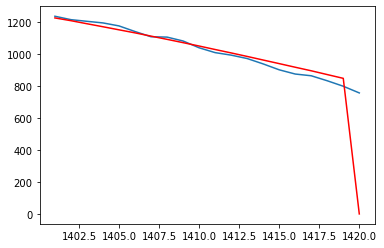

In [15]:
#plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Auto Correlation at lag = k 

Calculate the Pearson Correlation coefficient for different lags to see how that varies.

In [16]:
values = pd.DataFrame(series.value)
values

,value
0,13.894031
1,33.578274
2,88.933746
3,125.389424
4,152.962000
...,...
1416,874.421670
1417,863.603996
1418,832.340474
1419,798.155829


In [17]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions = predictions.replace(np.nan,0)

Lag : 0

Test RMSE: 170.82369157849405
     t-0    t
t-0  1.0  1.0
t    1.0  1.0



Lag : 1

Test RMSE: 170.82369157849405
          t-1         t
t-1  1.000000  0.990448
t    0.990448  1.000000



Lag : 2

Test RMSE: 170.82369157849405
          t-2         t
t-2  1.000000  0.980396
t    0.980396  1.000000



Lag : 3

Test RMSE: 170.82369157849405
          t-3         t
t-3  1.000000  0.975087
t    0.975087  1.000000



Lag : 4

Test RMSE: 170.82369157849405
          t-4         t
t-4  1.000000  0.969238
t    0.969238  1.000000



Lag : 5

Test RMSE: 170.82369157849405
          t-5         t
t-5  1.000000  0.962735
t    0.962735  1.000000



Lag : 6

Test RMSE: 170.82369157849405
         t-6        t
t-6  1.00000  0.95581
t    0.95581  1.00000



Lag : 7

Test RMSE: 170.82369157849405
          t-7         t
t-7  1.000000  0.948306
t    0.948306  1.000000



Lag : 8

Test RMSE: 170.82369157849405
         t-8        t
t-8  1.00000  0.94017
t    0.94017  1.00000



Lag : 9

Test RM

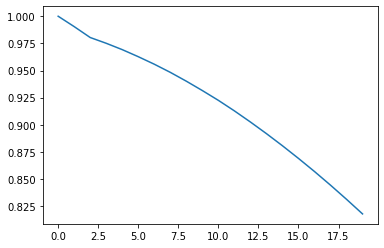

In [18]:
##Plot a list of Autocorrelation vs Values at lags
autocorr = []
for lag in range(0,20):
    print("Lag : " + str(lag) + "\n")
    rmse = sqrt(mean_squared_error(test[:len(predictions)],predictions))
    print(f"Test RMSE: {rmse}")
    df = pd.concat([values.shift(lag),values],axis =1)
    df.columns = ['t-'+str(lag),'t']
    result = df.corr()
    autocorr.append(result.t[0])
    print(result)
    print("\n\n")
    
plt.plot([i for i in (autocorr)])

# Get all anomalies

In [19]:
##Get all anomalies
serAnomaly = series[series.is_anomaly == 1]
insAnomaly = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M2_outliers.csv')

# allAnomaly = insAnomaly.set_index('timestamp').join(serAnomaly.set_index('timestamp'),on='timestamp',lsuffix="inserted",rsuffix="original")
allAnomaly = insAnomaly.join(serAnomaly.set_index('timestamp'),on='timestamp',lsuffix="inserted",rsuffix="original",how='outer')


In [20]:
allAnomaly

,timestamp,value,is_anomaly
0.0,1418965200,NaN,NaN
1.0,1418968800,NaN,NaN
2.0,1418972400,NaN,NaN
3.0,1418976000,NaN,NaN
4.0,1418979600,NaN,NaN
...,...,...,...
137.0,1419458400,NaN,NaN
138.0,1419462000,NaN,NaN
139.0,1419465600,NaN,NaN
NaN,1419940800,1270.928129,1.0


# Using AR to model whole TS

I'm planning on doing this by fitting the model on a TS, then running forecast/predict with the index arguments from 0 -> train + test

Of all the mutated datasets M1 - M5, The original series, M1 and M2 and M3 may be suitable for testing, I don't get M4 and M5 may overwhelm the results.

In [21]:
series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')
series.head()

,timestamp,value,is_anomaly
0,1416726000,13.894031,0
1,1416729600,33.578274,0
2,1416733200,88.933746,0
3,1416736800,125.389424,0
4,1416740400,152.962000,0


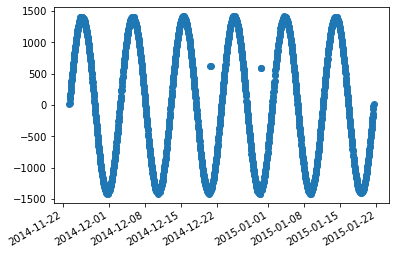

In [22]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(series['timestamp'],series['value'])
plt.gcf().autofmt_xdate()

In [23]:
# s1 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M1.csv')
# s1.head()
# s1['timestamp'] = pd.to_datetime(s1['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
# plt.plot_date(s1['timestamp'],s1['value'])
# plt.gcf().autofmt_xdate()

# s2 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M2.csv')
# s2.head()
# s2['timestamp'] = pd.to_datetime(s2['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
# plt.plot_date(s2['timestamp'],s2['value'])
# plt.gcf().autofmt_xdate()

# s3 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M3.csv')
# s3.head()
# s3['timestamp'] = pd.to_datetime(s3['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
# plt.plot_date(s3['timestamp'],s3['value'])
# plt.gcf().autofmt_xdate()

# s4 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M4.csv')
# s4.head()
# s4['timestamp'] = pd.to_datetime(s4['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
# plt.plot_date(s4['timestamp'],s4['value'])
# plt.gcf().autofmt_xdate()

# s5 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M5.csv')
# s5.head()
# s5['timestamp'] = pd.to_datetime(s5['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
# plt.plot_date(s5['timestamp'],s5['value'])
# plt.gcf().autofmt_xdate()

In [101]:
# split dataset
X = series.value
size = int(len(X)*0.66) #
train, test = X[1:size], X[1:len(X)]

The above line is training the AR model on half the series and testing it on the whole series.

In [102]:
from statsmodels.tsa.ar_model import AutoReg
# train autoregression
model = AutoReg(train, lags=30)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    0.044792
value.L1     1.011852
value.L2    -0.780653
value.L3     0.795057
value.L4    -0.596003
value.L5     0.618734
value.L6    -0.453771
value.L7     0.491607
value.L8    -0.356927
value.L9     0.387020
value.L10   -0.266390
value.L11    0.299744
value.L12   -0.213050
value.L13    0.240981
value.L14   -0.178501
value.L15    0.199117
value.L16   -0.148992
value.L17    0.161360
value.L18   -0.126329
value.L19    0.129396
value.L20   -0.107251
value.L21    0.084863
value.L22   -0.065008
value.L23    0.037844
value.L24   -0.058868
value.L25    0.031702
value.L26   -0.066747
value.L27    0.022899
value.L28   -0.070786
value.L29    0.016557
value.L30   -0.073607
dtype: float64


The below code makes the fitted AR model predict/model the TS from the first element to the last element, given it was trained on half the series. If it was trained on the whole series, then it seemed to overfit and predict everything perfectly.

In [128]:
# make predictions
predictions = model_fit.predict(start=1, end=len(X)-1, dynamic=False)
predictions = predictions.replace(np.nan,0)

for i in range(30):
    predictions.iloc[i] = train.iloc[i]
    
for i in range(len(predictions)):
 	print('predicted=%f, expected=%f' % (predictions.iloc[i], test.iloc[i]))


predicted=33.578274, expected=33.578274
predicted=88.933746, expected=88.933746
predicted=125.389424, expected=125.389424
predicted=152.962000, expected=152.962000
predicted=168.365150, expected=168.365150
predicted=211.863425, expected=211.863425
predicted=255.452289, expected=255.452289
predicted=295.065010, expected=295.065010
predicted=357.805877, expected=357.805877
predicted=375.746934, expected=375.746934
predicted=394.292129, expected=394.292129
predicted=425.906754, expected=425.906754
predicted=470.487595, expected=470.487595
predicted=505.187174, expected=505.187174
predicted=538.400434, expected=538.400434
predicted=579.767391, expected=579.767391
predicted=600.841041, expected=600.841041
predicted=648.673567, expected=648.673567
predicted=663.043224, expected=663.043224
predicted=706.487417, expected=706.487417
predicted=744.904292, expected=744.904292
predicted=773.496164, expected=773.496164
predicted=811.607978, expected=811.607978
predicted=832.300396, expected=832.300

In [104]:
len(test),len(predictions)

(1420, 1420)

In [105]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 280.914


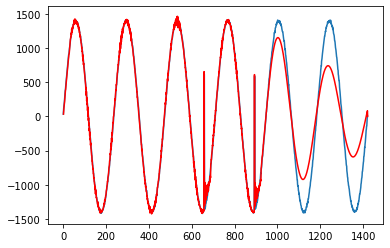

In [106]:
#plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

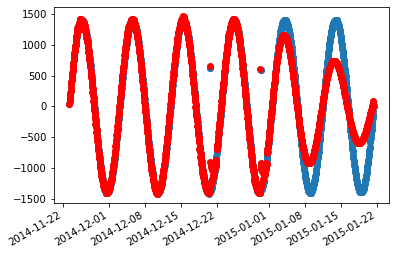

In [107]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(series['timestamp'][:len(series)-1],test)
plt.plot_date(series['timestamp'][:len(series)-1],predictions,color='red')
plt.gcf().autofmt_xdate()

In [108]:
df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2014-11-23 07:00:00 to 2015-01-21 11:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       1421 non-null   float64
 1   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 33.3 KB


In [109]:
#predictdf.set_index('timestamp').info()

In [120]:
predictdf = pd.concat([series['timestamp'][:len(series)-1],predictions], axis=1)

predictdf.rename(columns={0:'value'},inplace=True)

#predictdf['value'] = predictdf['value'].shift(-2)

predictdf = predictdf.dropna()
predictdf = predictdf.set_index('timestamp')
predictdf



,value
timestamp,
2014-11-23 09:00:00,33.578274
2014-11-23 10:00:00,88.933746
2014-11-23 11:00:00,125.389424
2014-11-23 12:00:00,152.962000
2014-11-23 13:00:00,168.365150
...,...
2015-01-21 06:00:00,12.624869
2015-01-21 07:00:00,26.812267
2015-01-21 08:00:00,40.927783


# Define threshold

let's try setting the threshold manually for now to 1200

In [121]:
threshold = 1200

can also try the z score, or the inter quartile range method or the n std deviations method

# See if AR model + threshold = Anomalies

In [122]:
test

1        33.578274
2        88.933746
3       125.389424
4       152.962000
5       168.365150
           ...    
1416   -141.419766
1417   -139.657834
1418    -70.550652
1419    -16.857148
1420      7.757660
Name: value, Length: 1420, dtype: float64

In [123]:
predictions, type(predictions)

(2        33.578274
 3        88.933746
 4       125.389424
 5       152.962000
 6       168.365150
            ...    
 1417     40.927783
 1418     54.961472
 1419     68.903486
 1420     82.744078
 1421      0.000000
 Length: 1420, dtype: float64,
 pandas.core.series.Series)

In [124]:
predictdf

,value
timestamp,
2014-11-23 09:00:00,33.578274
2014-11-23 10:00:00,88.933746
2014-11-23 11:00:00,125.389424
2014-11-23 12:00:00,152.962000
2014-11-23 13:00:00,168.365150
...,...
2015-01-21 06:00:00,12.624869
2015-01-21 07:00:00,26.812267
2015-01-21 08:00:00,40.927783


In [125]:
series

,timestamp,value,is_anomaly
0,2014-11-23 07:00:00,13.894031,0
1,2014-11-23 08:00:00,33.578274,0
2,2014-11-23 09:00:00,88.933746,0
3,2014-11-23 10:00:00,125.389424,0
4,2014-11-23 11:00:00,152.962000,0
...,...,...,...
1416,2015-01-21 07:00:00,-141.419766,0
1417,2015-01-21 08:00:00,-139.657834,0
1418,2015-01-21 09:00:00,-70.550652,0
1419,2015-01-21 10:00:00,-16.857148,0


In [116]:
series[series.is_anomaly == 1]

,timestamp,value,is_anomaly
658,2014-12-20 17:00:00,616.412915,1
659,2014-12-20 18:00:00,616.412915,1
893,2014-12-30 12:00:00,587.893627,1
894,2014-12-30 13:00:00,587.893627,1


In [117]:
threshold

1200

In [118]:
df_indexed

,value,is_anomaly
timestamp,,
2014-11-23 07:00:00,13.894031,0
2014-11-23 08:00:00,33.578274,0
2014-11-23 09:00:00,88.933746,0
2014-11-23 10:00:00,125.389424,0
2014-11-23 11:00:00,152.962000,0
...,...,...
2015-01-21 07:00:00,-141.419766,0
2015-01-21 08:00:00,-139.657834,0
2015-01-21 09:00:00,-70.550652,0


In [43]:
#predictdf.set_index('timestamp')

In [44]:
matrix = df_indexed.join(predictdf, on='timestamp',how='inner',lsuffix='_data',rsuffix='_predict')

In [45]:
matrix

,value_data,is_anomaly,value_predict
timestamp,,,
2014-11-23 07:00:00,13.894031,0,0.000000
2014-11-23 08:00:00,33.578274,0,0.000000
2014-11-23 09:00:00,88.933746,0,0.000000
2014-11-23 10:00:00,125.389424,0,0.000000
2014-11-23 11:00:00,152.962000,0,0.000000
...,...,...,...
2015-01-21 06:00:00,-187.471968,0,40.927783
2015-01-21 07:00:00,-141.419766,0,54.961472
2015-01-21 08:00:00,-139.657834,0,68.903486


In [46]:
outliers = matrix[matrix.value_data > matrix.value_predict + threshold]

In [47]:
outliers

,value_data,is_anomaly,value_predict
timestamp,,,
2014-12-20 17:00:00,616.412915,1,-1308.358106
2014-12-20 18:00:00,616.412915,1,-964.645820
2014-12-30 12:00:00,587.893627,1,-1314.956439
2014-12-30 13:00:00,587.893627,1,-975.218905


In [48]:
# outliers = outliers.append(predictdf[predictdf['value'] < -1*(threshold)])

In [49]:
outliers

,value_data,is_anomaly,value_predict
timestamp,,,
2014-12-20 17:00:00,616.412915,1,-1308.358106
2014-12-20 18:00:00,616.412915,1,-964.645820
2014-12-30 12:00:00,587.893627,1,-1314.956439
2014-12-30 13:00:00,587.893627,1,-975.218905


In [50]:
outliers = matrix[matrix.value_data > matrix.value_predict + threshold]
not_outliers = matrix[matrix.value_data <= matrix.value_predict + threshold]
#not_outliers.append(predictdf[predictdf['value'] > -1*(threshold)])
not_outliers

,value_data,is_anomaly,value_predict
timestamp,,,
2014-11-23 07:00:00,13.894031,0,0.000000
2014-11-23 08:00:00,33.578274,0,0.000000
2014-11-23 09:00:00,88.933746,0,0.000000
2014-11-23 10:00:00,125.389424,0,0.000000
2014-11-23 11:00:00,152.962000,0,0.000000
...,...,...,...
2015-01-21 06:00:00,-187.471968,0,40.927783
2015-01-21 07:00:00,-141.419766,0,54.961472
2015-01-21 08:00:00,-139.657834,0,68.903486


In [51]:
p = len(series[series.is_anomaly == 1])
p

n = len(series[series.is_anomaly == 0])
n

1417

In [52]:
series.set_index('timestamp')

,value,is_anomaly
timestamp,,
2014-11-23 07:00:00,13.894031,0
2014-11-23 08:00:00,33.578274,0
2014-11-23 09:00:00,88.933746,0
2014-11-23 10:00:00,125.389424,0
2014-11-23 11:00:00,152.962000,0
...,...,...
2015-01-21 07:00:00,-141.419766,0
2015-01-21 08:00:00,-139.657834,0
2015-01-21 09:00:00,-70.550652,0


In [53]:
# predictdf.set_index('timestamp')

In [54]:
# series.set_index('timestamp').join(predictdf.set_index('timestamp'),on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')

In [55]:
#outliers.set_index('timestamp')

In [56]:
checkingmatrix = series.set_index('timestamp').join(outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
checkingmatrix

,value,is_anomaly_test,value_data,is_anomaly_predict,value_predict
timestamp,,,,,
2014-12-20 17:00:00,616.412915,1,616.412915,1,-1308.358106
2014-12-20 18:00:00,616.412915,1,616.412915,1,-964.645820
2014-12-30 12:00:00,587.893627,1,587.893627,1,-1314.956439
2014-12-30 13:00:00,587.893627,1,587.893627,1,-975.218905


In [57]:
truepositives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 1]
truepositives

,value,is_anomaly_test,value_data,is_anomaly_predict,value_predict
timestamp,,,,,
2014-12-20 17:00:00,616.412915,1,616.412915,1,-1308.358106
2014-12-20 18:00:00,616.412915,1,616.412915,1,-964.645820
2014-12-30 12:00:00,587.893627,1,587.893627,1,-1314.956439
2014-12-30 13:00:00,587.893627,1,587.893627,1,-975.218905


In [58]:
falsepostives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 0]
falsepostives

,value,is_anomaly_test,value_data,is_anomaly_predict,value_predict
timestamp,,,,,


In [59]:
checkingmatrix2 =series.set_index('timestamp').join(not_outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
checkingmatrix2

,value,is_anomaly_test,value_data,is_anomaly_predict,value_predict
timestamp,,,,,
2014-11-23 07:00:00,13.894031,0,13.894031,0,0.000000
2014-11-23 08:00:00,33.578274,0,33.578274,0,0.000000
2014-11-23 09:00:00,88.933746,0,88.933746,0,0.000000
2014-11-23 10:00:00,125.389424,0,125.389424,0,0.000000
2014-11-23 11:00:00,152.962000,0,152.962000,0,0.000000
...,...,...,...,...,...
2015-01-21 06:00:00,-187.471968,0,-187.471968,0,40.927783
2015-01-21 07:00:00,-141.419766,0,-141.419766,0,54.961472
2015-01-21 08:00:00,-139.657834,0,-139.657834,0,68.903486


In [60]:
truenegatives=checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 0]
truenegatives

,value,is_anomaly_test,value_data,is_anomaly_predict,value_predict
timestamp,,,,,
2014-11-23 07:00:00,13.894031,0,13.894031,0,0.000000
2014-11-23 08:00:00,33.578274,0,33.578274,0,0.000000
2014-11-23 09:00:00,88.933746,0,88.933746,0,0.000000
2014-11-23 10:00:00,125.389424,0,125.389424,0,0.000000
2014-11-23 11:00:00,152.962000,0,152.962000,0,0.000000
...,...,...,...,...,...
2015-01-21 06:00:00,-187.471968,0,-187.471968,0,40.927783
2015-01-21 07:00:00,-141.419766,0,-141.419766,0,54.961472
2015-01-21 08:00:00,-139.657834,0,-139.657834,0,68.903486


In [61]:
truenegatives=checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 0]
falsenegatives = checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 1]
falsenegatives

,value,is_anomaly_test,value_data,is_anomaly_predict,value_predict
timestamp,,,,,


# Stationarize Time Series acc to Seasonality

In [62]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset.iloc[i] - dataset.iloc[i - interval]
		diff.append(value)
	return pd.Series(diff)

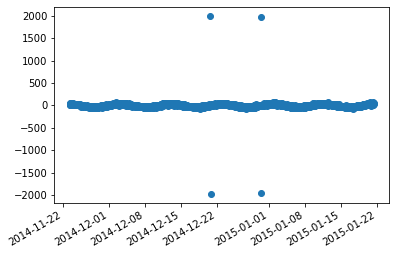

In [63]:
interval = 1
stTS = difference(series['value'],interval)
plt.plot_date(series['timestamp'][interval:],stTS)
plt.gcf().autofmt_xdate()

Even thought the seasonality may be 7, 30, 365 days, differencing with lag = 1 is the most effective.

We can see that the outliers really stand out right now.

In [64]:
stTS

0       19.684242
1       55.355473
2       36.455678
3       27.572576
4       15.403150
          ...    
1415    46.052202
1416     1.761932
1417    69.107182
1418    53.693504
1419    24.614807
Length: 1420, dtype: float64

In [65]:
stTS.mean(), stTS.median(), stTS.mode()

(-0.00432138851108536,
 -0.3909807801651368,
 0    0.0
 dtype: float64)

# Retrain AutoReg on Stationary TS

In [95]:
len(stTS),len(series)

(1420, 1421)

In [96]:
# split dataset
X = stTS
size = int(len(X)*0.66)
train, test = X[1:size], X[1:len(X)]

In [97]:
# train autoregression
model2 = AutoReg(train, lags=30)
model_fit2 = model2.fit()
print('Coefficients: %s' % model_fit2.params)

Coefficients: intercept   -0.433119
y.L1         0.072229
y.L2        -0.713174
y.L3         0.124020
y.L4        -0.480879
y.L5         0.164474
y.L6        -0.302092
y.L7         0.203720
y.L8        -0.169813
y.L9         0.221112
y.L10       -0.063377
y.L11        0.231869
y.L12       -0.000808
y.L13        0.230743
y.L14        0.032470
y.L15        0.219385
y.L16        0.051892
y.L17        0.199591
y.L18        0.057300
y.L19        0.173186
y.L20        0.054296
y.L21        0.127340
y.L22        0.058249
y.L23        0.086531
y.L24        0.032057
y.L25        0.059707
y.L26        0.007375
y.L27        0.032483
y.L28       -0.011530
y.L29        0.014560
y.L30       -0.018040
dtype: float64


The below code makes the fitted AR model predict/model the TS from the first element to the last element, given it was trained on half the series. If it was trained on the whole series, then it seemed to overfit and predict everything perfectly.

In [98]:
# make predictions
predictions2 = model_fit2.predict(start=1, end=len(X)-1, dynamic=False)
predictions2 = predictions2.replace(np.nan,0)
for i in range(len(predictions2)):
 	print('predicted=%f, expected=%f' % (predictions2.iloc[i], test.iloc[i]))


predicted=0.000000, expected=55.355473
predicted=0.000000, expected=36.455678
predicted=0.000000, expected=27.572576
predicted=0.000000, expected=15.403150
predicted=0.000000, expected=43.498275
predicted=0.000000, expected=43.588864
predicted=0.000000, expected=39.612721
predicted=0.000000, expected=62.740867
predicted=0.000000, expected=17.941057
predicted=0.000000, expected=18.545195
predicted=0.000000, expected=31.614625
predicted=0.000000, expected=44.580842
predicted=0.000000, expected=34.699579
predicted=0.000000, expected=33.213260
predicted=0.000000, expected=41.366957
predicted=0.000000, expected=21.073649
predicted=0.000000, expected=47.832526
predicted=0.000000, expected=14.369658
predicted=0.000000, expected=43.444193
predicted=0.000000, expected=38.416875
predicted=0.000000, expected=28.591872
predicted=0.000000, expected=38.111814
predicted=0.000000, expected=20.692418
predicted=0.000000, expected=35.747526
predicted=0.000000, expected=35.375579
predicted=0.000000, expec

predicted=1.265069, expected=30.360567
predicted=1.236122, expected=35.951563
predicted=1.207487, expected=36.043875
predicted=1.179161, expected=23.781572
predicted=1.151140, expected=10.678850
predicted=1.123421, expected=54.568255
predicted=1.096001, expected=40.861099
predicted=1.068877, expected=6.507563
predicted=1.042046, expected=27.118514
predicted=1.015503, expected=63.431979
predicted=0.989247, expected=21.361899
predicted=0.963274, expected=44.584675
predicted=0.937581, expected=26.757397
predicted=0.912166, expected=57.117347
predicted=0.887024, expected=29.731259
predicted=0.862153, expected=29.879001
predicted=0.837551, expected=38.168088
predicted=0.813213, expected=37.680513
predicted=0.789138, expected=38.507087
predicted=0.765323, expected=14.046576
predicted=0.741765, expected=64.576195
predicted=0.718460, expected=3.870850
predicted=0.695407, expected=29.005946
predicted=0.672603, expected=58.723064
predicted=0.650044, expected=46.167644
predicted=0.627729, expecte

In [70]:
len(predictions2),len(test),len(series)

(1419, 1419, 1421)

In [71]:
type(predictions2)

pandas.core.series.Series

In [72]:
rmse = sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 161.837


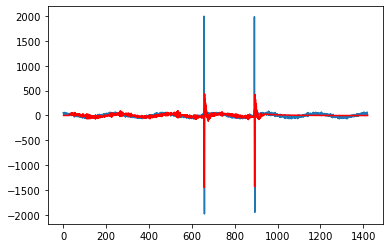

In [73]:
#plot results
plt.plot(test)
plt.plot(predictions2, color='red')
plt.show()

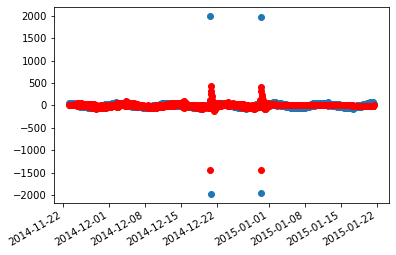

In [74]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(series['timestamp'][:len(series)-2],test)
plt.plot_date(series['timestamp'][:len(series)-2],predictions2,color='red')
plt.gcf().autofmt_xdate()

In [75]:
predictdf2 = pd.concat([series['timestamp'][:len(series)-1],predictions2], axis=1)

In [76]:
predictdf2.rename(columns={0:'value'},inplace=True)

In [77]:
predictdf2['value'] = predictdf2['value'].shift(-2)

In [78]:
predictdf2 = predictdf2.dropna()
predictdf2

,timestamp,value
0,2014-11-23 07:00:00,0.000000
1,2014-11-23 08:00:00,0.000000
2,2014-11-23 09:00:00,0.000000
3,2014-11-23 10:00:00,0.000000
4,2014-11-23 11:00:00,0.000000
...,...,...
1414,2015-01-21 05:00:00,-1.253968
1415,2015-01-21 06:00:00,-1.255753
1416,2015-01-21 07:00:00,-1.257518
1417,2015-01-21 08:00:00,-1.259265


# Test Stationarity using the Augmented Dicky Fuller Test

In [79]:
from statsmodels.tsa.stattools import adfuller
X = stTS
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.688285
p-value: 0.076088
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


The more negative this number, the more confidently we can reject the possiblity that the series is stationary. 

# Anomaly Detection with the differenced AR model

In [80]:
predictions2

2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
          ...   
1416   -1.253968
1417   -1.255753
1418   -1.257518
1419   -1.259265
1420    0.000000
Length: 1419, dtype: float64

In [81]:
predictions2.mean(),predictions2.std()

(0.4890141011905924, 64.42770009928446)

In [82]:
test

1       55.355473
2       36.455678
3       27.572576
4       15.403150
5       43.498275
          ...    
1415    46.052202
1416     1.761932
1417    69.107182
1418    53.693504
1419    24.614807
Length: 1419, dtype: float64

In [83]:
series, type(series)

(               timestamp       value  is_anomaly
 0    2014-11-23 07:00:00   13.894031           0
 1    2014-11-23 08:00:00   33.578274           0
 2    2014-11-23 09:00:00   88.933746           0
 3    2014-11-23 10:00:00  125.389424           0
 4    2014-11-23 11:00:00  152.962000           0
 ...                  ...         ...         ...
 1416 2015-01-21 07:00:00 -141.419766           0
 1417 2015-01-21 08:00:00 -139.657834           0
 1418 2015-01-21 09:00:00  -70.550652           0
 1419 2015-01-21 10:00:00  -16.857148           0
 1420 2015-01-21 11:00:00    7.757660           0
 
 [1421 rows x 3 columns],
 pandas.core.frame.DataFrame)

In [84]:
stTSDataframe = pd.concat([series['timestamp'],stTS],axis = 1 )
stTSDataframe.rename(columns={0:'value'},inplace=True)
stTSDataframe, type(stTSDataframe)

(               timestamp      value
 0    2014-11-23 07:00:00  19.684242
 1    2014-11-23 08:00:00  55.355473
 2    2014-11-23 09:00:00  36.455678
 3    2014-11-23 10:00:00  27.572576
 4    2014-11-23 11:00:00  15.403150
 ...                  ...        ...
 1416 2015-01-21 07:00:00   1.761932
 1417 2015-01-21 08:00:00  69.107182
 1418 2015-01-21 09:00:00  53.693504
 1419 2015-01-21 10:00:00  24.614807
 1420 2015-01-21 11:00:00        NaN
 
 [1421 rows x 2 columns],
 pandas.core.frame.DataFrame)

In [85]:
predictdf2,type(predictdf2)

(               timestamp     value
 0    2014-11-23 07:00:00  0.000000
 1    2014-11-23 08:00:00  0.000000
 2    2014-11-23 09:00:00  0.000000
 3    2014-11-23 10:00:00  0.000000
 4    2014-11-23 11:00:00  0.000000
 ...                  ...       ...
 1414 2015-01-21 05:00:00 -1.253968
 1415 2015-01-21 06:00:00 -1.255753
 1416 2015-01-21 07:00:00 -1.257518
 1417 2015-01-21 08:00:00 -1.259265
 1418 2015-01-21 09:00:00  0.000000
 
 [1419 rows x 2 columns],
 pandas.core.frame.DataFrame)

In [88]:
st_threshold = 300

In [94]:
predictdf2['value'], stTSDataframe['value']

(0       0.000000
 1       0.000000
 2       0.000000
 3       0.000000
 4       0.000000
           ...   
 1414   -1.253968
 1415   -1.255753
 1416   -1.257518
 1417   -1.259265
 1418    0.000000
 Name: value, Length: 1419, dtype: float64,
 0       19.684242
 1       55.355473
 2       36.455678
 3       27.572576
 4       15.403150
           ...    
 1416     1.761932
 1417    69.107182
 1418    53.693504
 1419    24.614807
 1420          NaN
 Name: value, Length: 1421, dtype: float64)

In [93]:
outliers2 = predictdf2['value'][stTSDataframe['value'] > predictdf2['value'] + st_threshold]
#outliers2 = outliers2.append(predictdf2[predictdf2['value'] < (-1) * st_threshold])

ValueError: Can only compare identically-labeled Series objects

In [ ]:
not_outliers2 =  predictdf2[predictdf2['value'] < st_threshold]
not_outliers2 =  not_outliers2.append(predictdf2[predictdf2['value'] > (-1) * st_threshold])

In [ ]:
outliers2

In [ ]:
outliers2.drop_duplicates(subset='timestamp')

In [ ]:
not_outliers2

In [ ]:
not_outliers2.drop_duplicates(subset='timestamp')

In [ ]:
outliers2 = outliers2.set_index('timestamp')
not_outliers2 = not_outliers2.set_index('timestamp')

In [ ]:
posmatrix = df_indexed.join(outliers2, on='timestamp',how='inner',lsuffix = '_test',rsuffix='_predict')
negmatrix = df_indexed.join(not_outliers2, on='timestamp',how='inner',lsuffix = '_test',rsuffix='_predict')

In [ ]:
posmatrix,negmatrix

In [ ]:
negmatrix

In [ ]:
negmatrix.drop_duplicates()

# Calculate F1 score

In [ ]:
p = len(series[series.is_anomaly == 1])
p

In [ ]:
n = len(series[series.is_anomaly == 0])
n

In [ ]:
precision = len(truepositives)/(len(truepositives) + len(falsepostives))

In [ ]:
recall = len(truepositives)/(len(truepositives) + len(falsenegatives))

$$ F_1 = 2 * \frac{precision * recall}{precision +
recall} $$

In [ ]:
f1 = 2*(precision * recall)/(precision + recall)

In [ ]:
f1

# Doing this in a loop

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import glob
from datetime import datetime
from statsmodels.tsa.ar_model import AutoReg
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [2]:
start_time = datetime.now()
all_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.004014


Processing index: 0 of 100
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
Test RMSE: 292.560


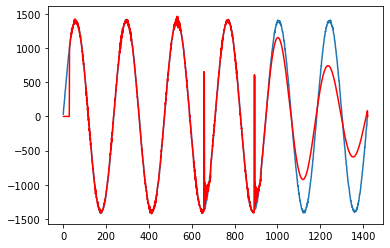

threshold:  1200
Outliers:
            value_data  is_anomaly  value_predict
timestamp                                        
1419094800  616.412915           1   -1308.358106
1419098400  616.412915           1    -964.645820
1419940800  587.893627           1   -1314.956439
1419944400  587.893627           1    -975.218905
Precision:  1.0
Recall: 1.0
F1: 1.0
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_10.csv
Test RMSE: 224.408


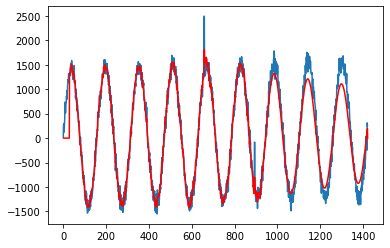

threshold:  1200
Outliers:
             value_data  is_anomaly  value_predict
timestamp                                         
1416816000  1229.227433           0            0.0
1416819600  1317.557571           0            0.0
Precision:  0.0
Recall: 0.0
precision + recall = 0
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_100.csv
Test RMSE: 2865.760


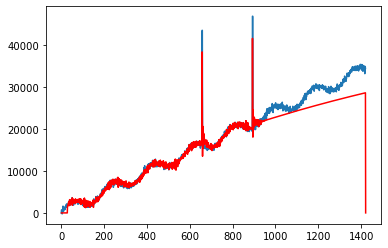

threshold:  1200
Outliers:
              value_data  is_anomaly  value_predict
timestamp                                          
1416758400   1617.147634           0       0.000000
1416783600   1219.643286           0       0.000000
1416790800   1419.903368           0       0.000000
1416798000   1278.488116           0       0.000000
1416801600   1579.963563           0       0.000000
...                  ...         ...            ...
1421820000  34188.268291           0   28592.749370
1421823600  34499.926302           0   28604.961922
1421827200  33192.985977           0   28617.167227
1421830800  34338.071070           0   28629.365289
1421834400  34919.246271           0       0.000000

[426 rows x 3 columns]
Precision:  0.009389671361502348
Recall: 1.0
F1: 0.0186046511627907
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_11.csv
Test RMSE: 1179.929


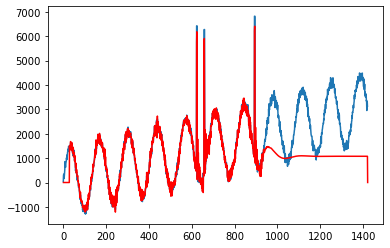

threshold:  1200
Outliers:
             value_data  is_anomaly  value_predict
timestamp                                         
1416801600  1248.757108           0       0.000000
1416805200  1259.029372           0       0.000000
1416808800  1368.278985           0       0.000000
1416812400  1304.811674           0       0.000000
1416816000  1396.474559           0       0.000000
...                 ...         ...            ...
1421820000  3339.711467           0    1075.305792
1421823600  3370.568406           0    1075.306610
1421827200  2952.882613           0    1075.307286
1421830800  3213.559675           0    1075.307823
1421834400  3317.889934           0       0.000000

[304 rows x 3 columns]
Precision:  0.029605263157894735
Recall: 1.0
F1: 0.05750798722044728
AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:00.821803
Average F1 score over 5 runs is = 0.35870421279441267


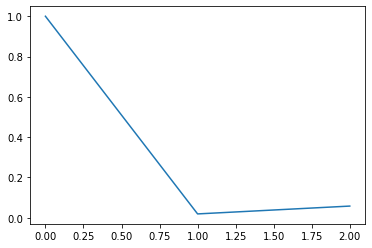

In [20]:
start_time = datetime.now() 
f1_plot = []
rmse_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 3:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
    # split dataset
    X = df.value
    size = int(len(X)*0.66)
    train, test = X[1:size], X[1:len(X)]
    
    # train autoregression
    model = AutoReg(train, lags=30)
    model_fit = model.fit()

    # make predictions
    predictions = model_fit.predict(start=1, end=len(X)-1, dynamic=False)
    predictions = predictions.replace(np.nan,0)

    #calculate rmse
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'file: {file}')
    print('Test RMSE: %.3f' % rmse)
    rmse_plot.append(rmse)
    
    #plot results
    #plt.rcParams.update({'figure.figsize': (10,10)})
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.savefig("./ARoutput/" + fname +"ARLag30")
    plt.show()
    
    
    predictdf = pd.concat([df['timestamp'][:len(df)-1],predictions], axis=1)
    predictdf.rename(columns={0:'value'},inplace=True)
    predictdf['value'] = predictdf['value'].shift(-2)
    predictdf = predictdf.dropna()
    predictdf = predictdf.set_index('timestamp')
    
    #combine with df_indexed with predictions to pick out the outliers.
    matrix = df_indexed.join(predictdf, on='timestamp',how='inner',lsuffix='_data',rsuffix='_predict')
    
    #manual threshold set
    threshold = 1200
    
    #compare the real df value with the AR model and then 
    outliers = matrix[matrix.value_data > matrix.value_predict + threshold]
    not_outliers = matrix[matrix.value_data <= matrix.value_predict + threshold]
    
    print("threshold: ", threshold)
    print("Outliers:")
    print(outliers)
    
#     p = len(series[series.is_anomaly == 1])
#     n = len(series[series.is_anomaly == 0])

    checkingmatrix = df.set_index('timestamp').join(outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truepositives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 1]
    falsepostives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 0]
    
    checkingmatrix2 =df.set_index('timestamp').join(not_outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truenegatives=checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 0]
    falsenegatives = checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    
    
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    print("Recall:", recall)
    recall_plot.append(recall)
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        continue
    

    
end_time=datetime.now()
print(f"AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)
print(f"Average F1 score over {index+1} runs is = {sum(f1_plot)/len(f1_plot)}")

In [ ]:
print(sum(f1_plot)/len(f1_plot))

# Loop with Standardized data

Processing index: 0 of 100
Mean: 6.368346, StandardDeviation: 987.420584
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
Test RMSE: 0.296


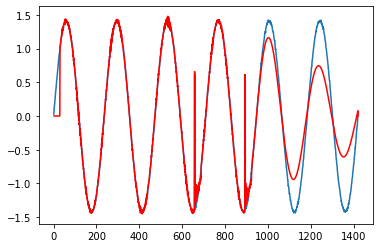

threshold:  1200
Outliers:
             value_data  is_anomaly  value_predict
timestamp                                         
1416870000  1242.027630           0       1.301051
1416873600  1246.534770           0       1.266994
1416877200  1252.187652           0       1.320483
1416880800  1263.931519           0       1.298167
1416884400  1275.270229           0       1.335224
...                 ...         ...            ...
1421258400  1296.176434           0       0.588777
1421262000  1267.340967           0       0.576623
1421265600  1235.675464           0       0.564093
1421269200  1214.292346           0       0.551199
1421272800  1203.992032           0       0.537951

[245 rows x 3 columns]
Precision:  0.0
Recall: 0.0
precision + recall = 0
Mean: 100.510082, StandardDeviation: 994.197252
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_10.csv
Test RMSE: 0.220


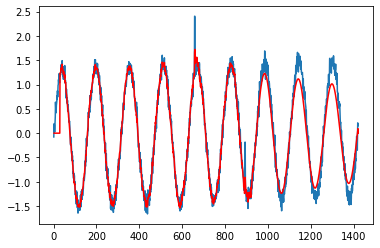

threshold:  1200
Outliers:
             value_data  is_anomaly  value_predict
timestamp                                         
1416816000  1229.227433           0       0.000000
1416819600  1317.557571           0       0.000000
1416830400  1289.582817           0       1.227590
1416834000  1282.702809           0       1.243942
1416837600  1271.258396           0       1.240797
...                 ...         ...            ...
1421463600  1511.796692           0       0.715930
1421467200  1262.860099           0       0.686347
1421470800  1208.497862           0       0.655649
1421478000  1326.627180           0       0.591112
1421488800  1319.752870           0       0.487256

[291 rows x 3 columns]
Precision:  0.006872852233676976
Recall: 0.5
F1: 0.013559322033898305
Mean: 17255.105564, StandardDeviation: 10042.787001
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_100.csv
Test RMSE: 0.356


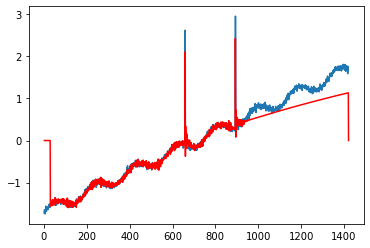

threshold:  1200
Outliers:
              value_data  is_anomaly  value_predict
timestamp                                          
1416758400   1617.147634           0       0.000000
1416783600   1219.643286           0       0.000000
1416790800   1419.903368           0       0.000000
1416798000   1278.488116           0       0.000000
1416801600   1579.963563           0       0.000000
...                  ...         ...            ...
1421820000  34188.268291           0       1.128934
1421823600  34499.926302           0       1.130150
1421827200  33192.985977           0       1.131365
1421830800  34338.071070           0       1.132580
1421834400  34919.246271           0       0.000000

[1403 rows x 3 columns]
Precision:  0.002851033499643621
Recall: 1.0
F1: 0.005685856432125089
Mean: 1613.761107, StandardDeviation: 1381.918933
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_11.csv
Test RMSE: 0.851


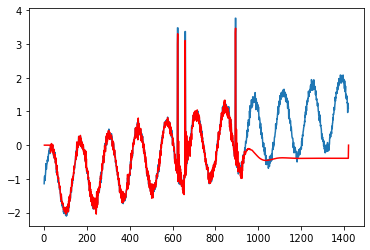

threshold:  1200
Outliers:
             value_data  is_anomaly  value_predict
timestamp                                         
1416801600  1248.757108           0       0.000000
1416805200  1259.029372           0       0.000000
1416808800  1368.278985           0       0.000000
1416812400  1304.811674           0       0.000000
1416816000  1396.474559           0       0.000000
...                 ...         ...            ...
1421820000  3339.711467           0      -0.389643
1421823600  3370.568406           0      -0.389643
1421827200  2952.882613           0      -0.389642
1421830800  3213.559675           0      -0.389642
1421834400  3317.889934           0       0.000000

[869 rows x 3 columns]
Precision:  0.010356731875719217
Recall: 1.0
F1: 0.02050113895216401
AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:00.948178
Average F1 score over 5 runs is = 0.013248772472729134


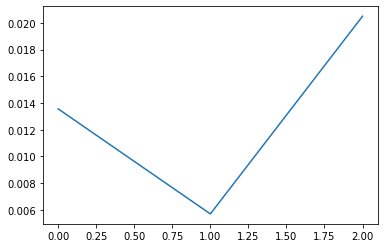

In [10]:
start_time = datetime.now() 
f1_plot = []
rmse_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 3:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
    # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    df['std_value'] = standardaized
    
    # split dataset
    X = df.std_value
    size = int(len(X)*0.66)
    train, test = X[1:size], X[1:len(X)]
    
    # train autoregression
    model = AutoReg(train, lags=30)
    model_fit = model.fit()

    # make predictions
    predictions = model_fit.predict(start=1, end=len(X)-1, dynamic=False)
    predictions = predictions.replace(np.nan,0)

    #calculate rmse
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'file: {file}')
    print('Test RMSE: %.3f' % rmse)
    rmse_plot.append(rmse)
    
    #plot results
    #plt.rcParams.update({'figure.figsize': (10,10)})
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.savefig("./ARoutput/" + fname +"ARLag30")
    plt.show()
    
    
    predictdf = pd.concat([df['timestamp'][:len(df)-1],predictions], axis=1)
    predictdf.rename(columns={0:'value'},inplace=True)
    predictdf['value'] = predictdf['value'].shift(-2)
    predictdf = predictdf.dropna()
    predictdf = predictdf.set_index('timestamp')
    
    #combine with df_indexed with predictions to pick out the outliers.
    matrix = df_indexed.join(predictdf, on='timestamp',how='inner',lsuffix='_data',rsuffix='_predict')
    
    #manual threshold set
    threshold = 1200
    
    #compare the real df value with the AR model and then 
    outliers = matrix[matrix.std_value > matrix.value_predict + threshold]
    not_outliers = matrix[matrix.std_value <= matrix.value_predict + threshold]
    
    print("threshold: ", threshold)
    print("Outliers:")
    print(outliers)
    
#     p = len(series[series.is_anomaly == 1])
#     n = len(series[series.is_anomaly == 0])

    checkingmatrix = df.set_index('timestamp').join(outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truepositives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 1]
    falsepostives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 0]
    
    checkingmatrix2 =df.set_index('timestamp').join(not_outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truenegatives=checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 0]
    falsenegatives = checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    
    
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    print("Recall:", recall)
    recall_plot.append(recall)
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        continue
    

    
end_time=datetime.now()
print(f"AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)
print(f"Average F1 score over {index+1} runs is = {sum(f1_plot)/len(f1_plot)}")

# Fixing performance

The performance of the above test suggested I was not doing something right.
So I checked out the ARIMA code from machine learning mastery.com to verify my implementation. They provided and alternate implementation that predicted each point in the test set and was updated subsequently by training a new model on all the predictions so far. 



X
 timestamp
1416726000    -225.252406
1416729600     105.253853
1416733200    -224.668317
1416736800     690.872615
1416740400     271.832679
                 ...     
1421823600    1149.599232
1421827200    1554.202709
1421830800    1665.755022
1421834400    1700.159284
1421838000    1628.673158
Name: value, Length: 1421, dtype: float64

train
 timestamp
1416726000    -225.252406
1416729600     105.253853
1416733200    -224.668317
1416736800     690.872615
1416740400     271.832679
                 ...     
1420081200     243.792790
1420084800    -525.907462
1420088400     664.437110
1420092000    1196.307925
1420095600     470.776653
Name: value, Length: 937, dtype: float64 
test
 timestamp
1420099200      -2.705091
1420102800     390.702470
1420106400     223.221753
1420110000     582.944593
1420113600     879.620266
                 ...     
1421823600    1149.599232
1421827200    1554.202709
1421830800    1665.755022
1421834400    1700.159284
1421838000    1628.673158
Name: val

predicted=120.775938, expected=-801.911839
predicted=71.448535, expected=-68.934558
predicted=159.577486, expected=700.949064
predicted=183.213085, expected=313.093909
predicted=217.391255, expected=58.580329
predicted=205.655981, expected=371.407110
predicted=249.932557, expected=430.003955
predicted=427.539573, expected=420.495943
predicted=286.902513, expected=817.039170
predicted=337.286446, expected=1223.337857
predicted=500.454930, expected=1067.806103
predicted=617.500178, expected=1198.002302
predicted=788.752241, expected=666.333597
predicted=755.574416, expected=1127.678671
predicted=825.823780, expected=506.321534
predicted=770.294046, expected=847.989851
predicted=960.022831, expected=1725.064024
predicted=1067.509198, expected=969.449395
predicted=1246.932513, expected=901.884235
predicted=1121.663746, expected=839.255069
predicted=1192.532303, expected=1366.648161
predicted=1250.330591, expected=1886.601231
predicted=1339.940529, expected=1313.058557
predicted=1374.847260

predicted=-490.069001, expected=444.994504
predicted=-435.158521, expected=-402.250637
predicted=-423.775225, expected=-561.930728
predicted=-440.197375, expected=-660.996466
predicted=-418.180393, expected=-200.550004
predicted=-431.914961, expected=-279.993861
predicted=-487.472791, expected=-37.386468
predicted=-395.800267, expected=-220.109012
predicted=-373.445986, expected=206.458507
predicted=-276.387118, expected=165.409544
predicted=-232.893189, expected=299.859605
predicted=-114.648629, expected=20.611587
predicted=-131.439826, expected=349.998866
predicted=43.399287, expected=-64.007189
predicted=7.987340, expected=317.225891
predicted=211.746383, expected=-58.893862
predicted=97.296556, expected=-229.315637
predicted=201.285042, expected=-404.313747
predicted=32.767427, expected=-199.492762
predicted=247.354042, expected=-192.731455
predicted=108.929355, expected=307.443638
predicted=201.657371, expected=103.415407
predicted=129.038654, expected=-81.794250
predicted=199.301

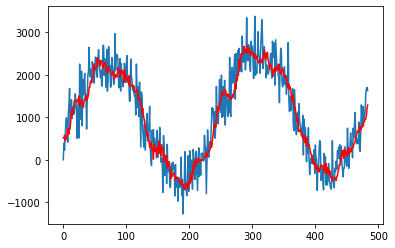

In [7]:
X = df_indexed.value
print("\n\nX\n",X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
print("\ntrain\n",train,"\ntest\n",test)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
 	model = AutoReg(history, lags=30)
 	model_fit = model.fit()
 	output = model_fit.predict(start=len(history), end=len(history)+1, dynamic=False)
 	yhat = output[0]
 	predictions.append(yhat)
 	obs = test.iloc[t]
 	history.append(obs)
 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig1 = plt.figure()
plt.plot(test.tolist())
plt.plot(predictions, color='red')
plt.show()

Processing index: 0 of 100
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
Test RMSE: 413.005


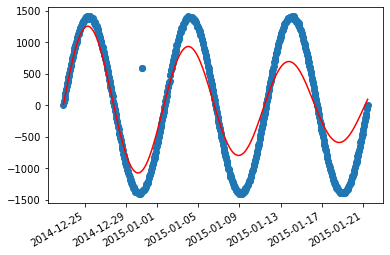

threshold:  1200
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_predict]
Index: []
truepositives + falsepositives = 0
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_10.csv
Test RMSE: 186.020


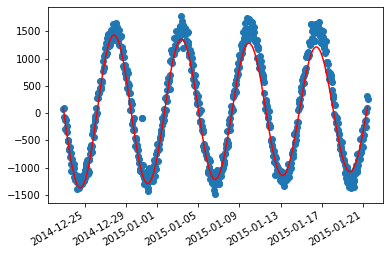

threshold:  1200
Outliers:
                      value_data  is_anomaly  value_predict
timestamp                                                  
2014-11-23 16:00:00   735.374675           0    -526.795414
2014-11-23 19:00:00   529.769665           0    -680.728328
2014-11-23 20:00:00   665.571204           0    -736.565066
2014-11-23 21:00:00   712.611294           0    -777.427027
2014-11-23 22:00:00   748.120095           0    -847.572666
...                          ...         ...            ...
2014-12-22 03:00:00   952.022961           0    -555.311271
2014-12-22 04:00:00   930.020515           0    -517.025128
2014-12-22 05:00:00  1048.121639           0    -477.859964
2014-12-22 06:00:00   892.034503           0    -437.878907
2014-12-22 08:00:00   956.220414           0    -355.727806

[276 rows x 3 columns]
Precision:  0.007246376811594203
Recall: 1.0
F1: 0.014388489208633093
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_100.csv


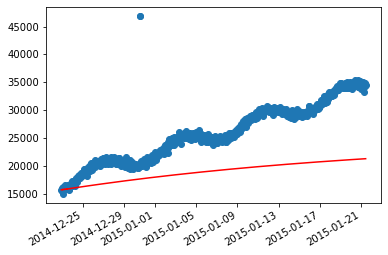

threshold:  1200
Outliers:
                       value_data  is_anomaly  value_predict
timestamp                                                   
2014-12-20 17:00:00  43520.564531           1   21036.027645
2014-12-20 18:00:00  43520.564531           1   21041.176086
Precision:  1.0
Recall: 1.0
F1: 1.0
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_11.csv
Test RMSE: 1848.613


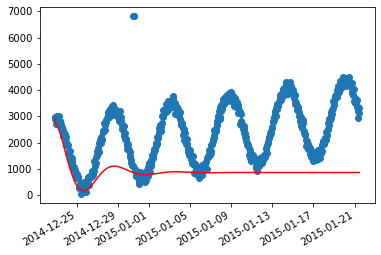

threshold:  1200
Outliers:
                      value_data  is_anomaly  value_predict
timestamp                                                  
2014-12-05 20:00:00  2199.430283           0     875.496978
2014-12-05 21:00:00  2121.983743           0     874.645046
2014-12-05 22:00:00  2271.892489           0     873.779453
2014-12-06 10:00:00  2084.167924           0     863.085437
2014-12-11 01:00:00  2128.245011           0     859.990751
...                          ...         ...            ...
2014-12-22 15:00:00  2687.868598           0     856.446409
2014-12-22 16:00:00  2778.985988           0     856.447194
2014-12-22 17:00:00  2877.292895           0     856.447848
2014-12-22 18:00:00  2934.390908           0     856.448374
2014-12-22 19:00:00  2938.095549           0     856.448774

[97 rows x 3 columns]
Precision:  0.061855670103092786
Recall: 1.0
F1: 0.11650485436893204
AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:07.17

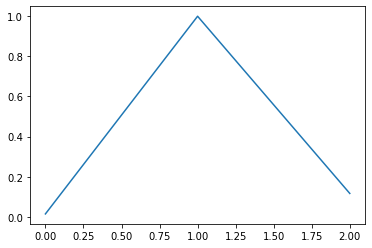

In [32]:
start_time = datetime.now() 
f1_plot = []
rmse_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 3:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
    # split dataset
    X = df.value
    size = int(len(X)*0.5)
    train, test = X[0:size], X[size:len(X)]
    
    history = [x for x in train]
    predictions = list()
        
    for t in range(len(test)):
        # train autoregression
        model = AutoReg(history, lags=30)
        model_fit = model.fit()
        # make predictions
        output = model_fit.predict(start=len(history), end=len(history)+1, dynamic=False)
        yhat = output[0]
        predictions.append(yhat)
        #obs = X.iloc[t]
        history.append(yhat)
        #print('predicted=%f, expected=%f' % (yhat, obs))


    #calculate rmse
    error = sqrt(mean_squared_error(test, predictions))
    print(f'file: {file}')
    print('Test RMSE: %.3f' % error)
    rmse_plot.append(error)
    
    #plot results
    #plt.rcParams.update({'figure.figsize': (10,10)})
    plt.plot_date(df['timestamp'][size:],df['value'][size:])
    plt.plot_date(df['timestamp'][size:],predictions,color="red",fmt="-")
    plt.gcf().autofmt_xdate()
    plt.savefig("./ARoutput/" + fname +"ARLag30")
    plt.show()
    
    
    predictdf = pd.concat([df['timestamp'][:len(df)-1],pd.Series(predictions)], axis=1)
    predictdf.rename(columns={0:'value'},inplace=True)
    predictdf['value'] = predictdf['value'].shift(-2)
    predictdf = predictdf.dropna()
    predictdf = predictdf.set_index('timestamp')
    
    #combine with df_indexed with predictions to pick out the outliers.
    matrix = df_indexed.join(predictdf, on='timestamp',how='inner',lsuffix='_data',rsuffix='_predict')
    
    #manual threshold set
    threshold = 1200
    
    #compare the real df value with the AR model and then 
    outliers = matrix[matrix.value_data > matrix.value_predict + threshold]
    not_outliers = matrix[matrix.value_data <= matrix.value_predict + threshold]
    
    print("threshold: ", threshold)
    print("Outliers:")
    print(outliers)
    
#     p = len(series[series.is_anomaly == 1])
#     n = len(series[series.is_anomaly == 0])

    checkingmatrix = df.set_index('timestamp').join(outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truepositives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 1]
    falsepostives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 0]
    
    checkingmatrix2 =df.set_index('timestamp').join(not_outliers,on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truenegatives=checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 0]
    falsenegatives = checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    
    
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    print("Recall:", recall)
    recall_plot.append(recall)
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        continue
    

    
end_time=datetime.now()
print(f"AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)
print(f"Average F1 score over {index} runs is = {sum(f1_plot)/len(f1_plot)}")

In [25]:
pd.Series(predictions)

0       1550.063386
1       1546.783529
2       1547.182615
3       1547.829689
4       1541.064932
           ...     
1416    1567.597599
1417    1567.583904
1418    1567.587353
1419    1567.304803
1420    1567.277891
Length: 1421, dtype: float64

# Fixing Performance with standardization

Processing index: 0 of 100
Mean: 4471.669226, StandardDeviation: 2925.391670
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_23.csv
Test RMSE: 1.593


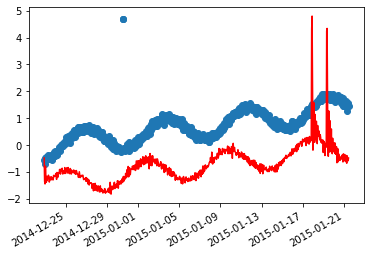

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
624 2014-12-19 07:00:00  19740.188389           1   5.219308       2.322400
625 2014-12-19 08:00:00  19740.188389           1   5.219308      -0.188258
659 2014-12-20 18:00:00  18553.830928           1   4.813770       1.772799
660 2014-12-20 19:00:00  18553.830928           1   4.813770      -0.395717
Precision:  1.0
Recall: 0.6666666666666666
F1: 0.8
--------------------
Mean: 281.561558, StandardDeviation: 1014.996111
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_24.csv
Test RMSE: 1.941


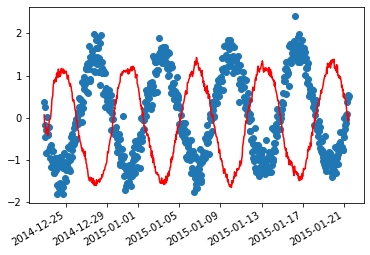

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 3211.798426, StandardDeviation: 2136.444375
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_25.csv
Test RMSE: 1.632


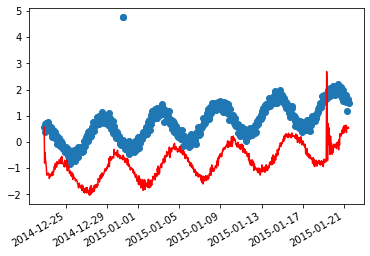

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  12575.790049           1   4.382979       2.166946
659 2014-12-20 18:00:00  12575.790049           1   4.382979      -0.711480
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 677.021695, StandardDeviation: 1078.857833
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_26.csv
Test RMSE: 0.683


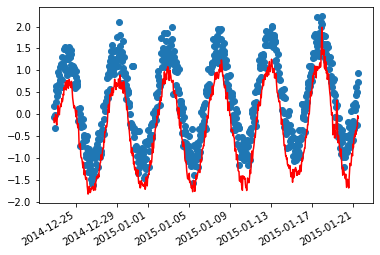

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
625 2014-12-19 08:00:00  3755.844471           1   2.853780       1.365911
660 2014-12-20 19:00:00  2041.956620           1   1.265167      -0.455589
Precision:  1.0
Recall: 0.3333333333333333
F1: 0.5
--------------------
Mean: 2841.957725, StandardDeviation: 1929.904148
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_27.csv
Test RMSE: 1.655


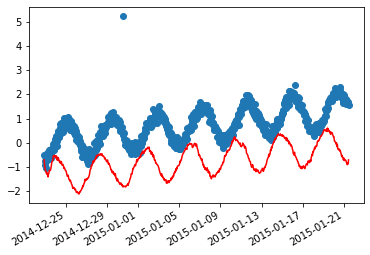

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 9202.203480, StandardDeviation: 5383.176339
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_28.csv
Test RMSE: 1.708


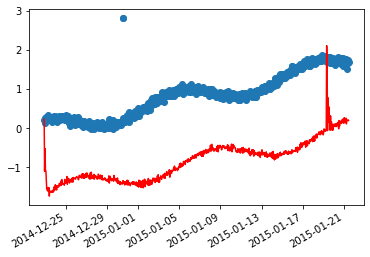

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
659 2014-12-20 18:00:00  23827.991635           1   2.716944      -0.058388
Precision:  1.0
Recall: 0.5
F1: 0.6666666666666666
--------------------
Mean: 853.154308, StandardDeviation: 1095.773774
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_29.csv
Test RMSE: 0.853


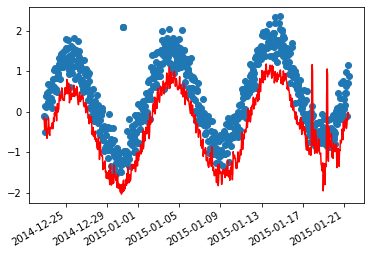

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
623 2014-12-19 06:00:00  3599.566321           1   2.506368       1.167367
624 2014-12-19 07:00:00  3599.566321           1   2.506368       1.026375
625 2014-12-19 08:00:00  3599.566321           1   2.506368      -0.830995
658 2014-12-20 17:00:00  3449.742128           1   2.369639       1.062111
659 2014-12-20 18:00:00  3449.742128           1   2.369639       0.933625
660 2014-12-20 19:00:00  3449.742128           1   2.369639      -1.081939
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 5.536843, StandardDeviation: 989.172534
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_3.csv
Test RMSE: 1.997


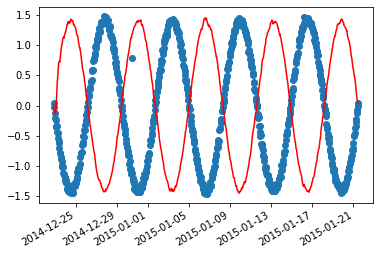

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 5950.417354, StandardDeviation: 3552.981132
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_30.csv
Test RMSE: 1.714


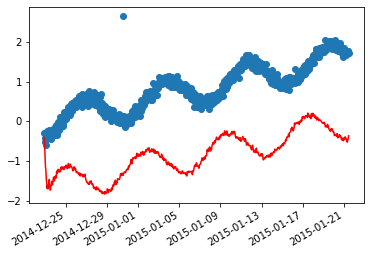

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 959.394771, StandardDeviation: 1155.849408
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_31.csv
Test RMSE: 1.853


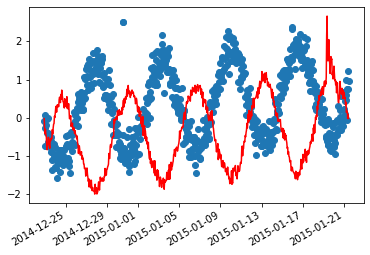

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  6519.797396           1   4.810664       2.664010
659 2014-12-20 18:00:00  6519.797396           1   4.810664       1.651183
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 10 of 100
Mean: 3878.769478, StandardDeviation: 2453.291769
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_32.csv
Test RMSE: 1.654


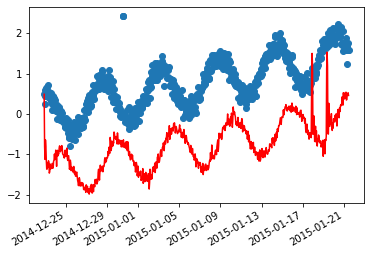

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
625 2014-12-19 08:00:00  8812.542813           1   2.011083      -0.502641
660 2014-12-20 19:00:00  8987.656808           1   2.082462      -0.493227
Precision:  1.0
Recall: 0.3333333333333333
F1: 0.5
--------------------
Mean: 533.967462, StandardDeviation: 1069.884522
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_33.csv
Test RMSE: 0.621


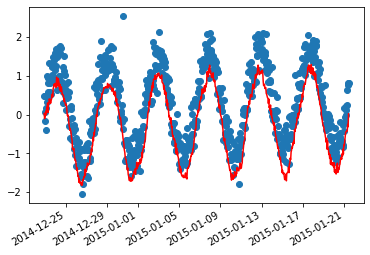

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 2873.685166, StandardDeviation: 1957.027297
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_34.csv
Test RMSE: 1.638


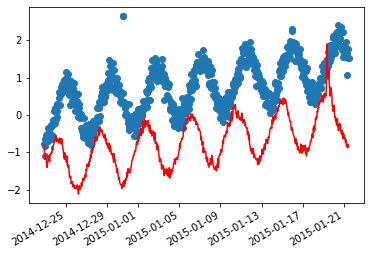

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  9088.466267           1   3.175623       1.902206
659 2014-12-20 18:00:00  9088.466267           1   3.175623       1.117211
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 11410.899789, StandardDeviation: 7069.718250
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_35.csv
Test RMSE: 1.629


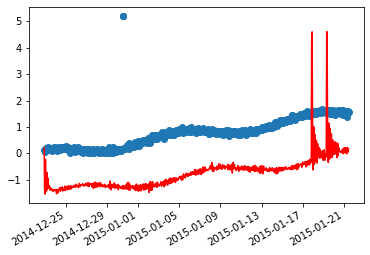

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
624 2014-12-19 07:00:00  45998.101187           1   4.892303       1.452682
625 2014-12-19 08:00:00  45998.101187           1   4.892303      -0.627075
659 2014-12-20 18:00:00  46597.041510           1   4.977022       1.395516
660 2014-12-20 19:00:00  46597.041510           1   4.977022      -0.281953
Precision:  1.0
Recall: 0.6666666666666666
F1: 0.8
--------------------
Mean: 634.296881, StandardDeviation: 1095.076584
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_36.csv
Test RMSE: 0.690


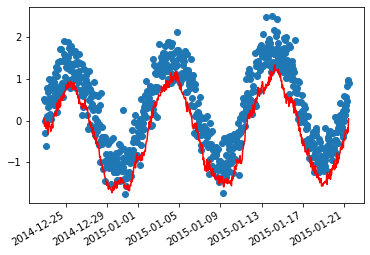

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
494 2014-12-13 21:00:00  2549.909892           0   1.749296       0.507307
Precision:  0.0
truepositives + falsenegatives = 0
Mean: 6556.232773, StandardDeviation: 4013.701672
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_37.csv
Test RMSE: 1.667


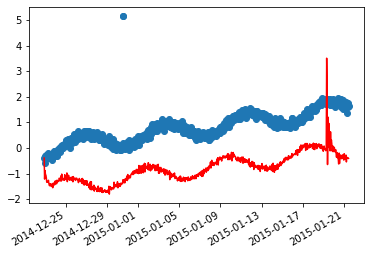

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  27200.959593           1   5.143563       2.300259
659 2014-12-20 18:00:00  27200.959593           1   5.143563      -0.645412
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1442.278105, StandardDeviation: 1306.683693
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_38.csv
Test RMSE: 1.799


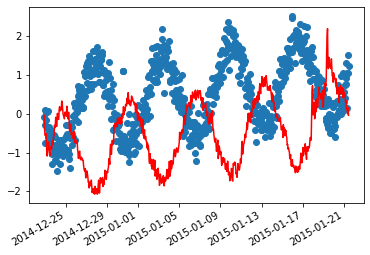

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
625 2014-12-19 08:00:00  3594.659515           1   1.647209      -0.028885
660 2014-12-20 19:00:00  5571.619038           1   3.160169       1.301019
Precision:  1.0
Recall: 0.3333333333333333
F1: 0.5
--------------------
Mean: 5179.096630, StandardDeviation: 3173.156284
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_39.csv
Test RMSE: 1.703


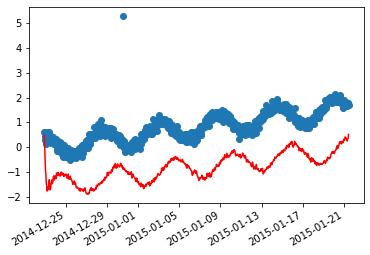

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 632.735854, StandardDeviation: 1043.469684
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_4.csv
Test RMSE: 1.426


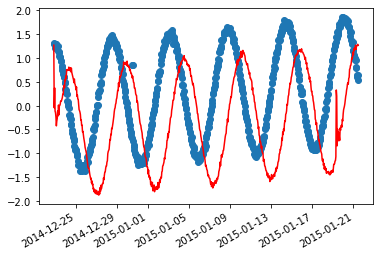

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
659 2014-12-20 18:00:00  1200.882156           1   0.544478      -0.845658
Precision:  1.0
Recall: 0.5
F1: 0.6666666666666666
--------------------
Mean: 1588.069123, StandardDeviation: 1364.684820
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_40.csv
Test RMSE: 1.219


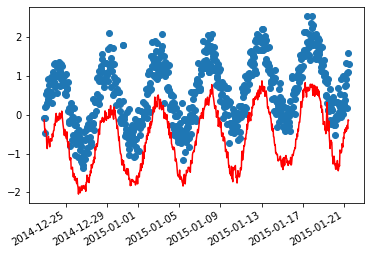

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  4205.406804           1   1.917906       0.318710
659 2014-12-20 18:00:00  4205.406804           1   1.917906      -0.088505
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 20 of 100
Mean: 3224.960580, StandardDeviation: 2265.218133
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_41.csv
Test RMSE: 1.576


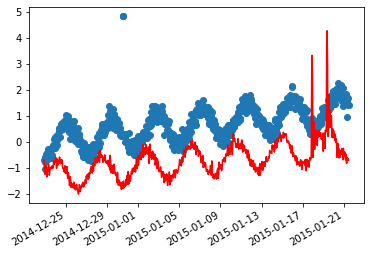

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
624 2014-12-19 07:00:00  12989.167526           1   4.310493       2.332566
625 2014-12-19 08:00:00  12989.167526           1   4.310493      -0.601003
659 2014-12-20 18:00:00  15126.731611           1   5.254139       3.169707
660 2014-12-20 19:00:00  15126.731611           1   5.254139       0.207643
Precision:  1.0
Recall: 0.6666666666666666
F1: 0.8
--------------------
Mean: 14015.791325, StandardDeviation: 8113.068457
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_42.csv
Test RMSE: 1.729


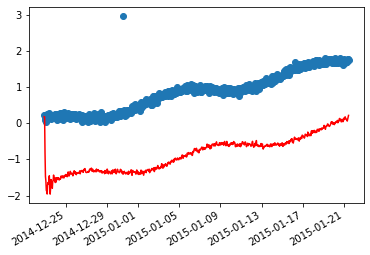

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 1844.380800, StandardDeviation: 1439.541406
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_43.csv
Test RMSE: 1.341


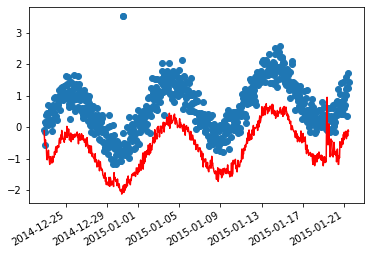

threshold:  1.2
Outliers:
              timestamp  value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  7147.29409           1   3.683752       0.951411
659 2014-12-20 18:00:00  7147.29409           1   3.683752      -0.467271
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 7485.049903, StandardDeviation: 4477.502832
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_44.csv
Test RMSE: 1.675


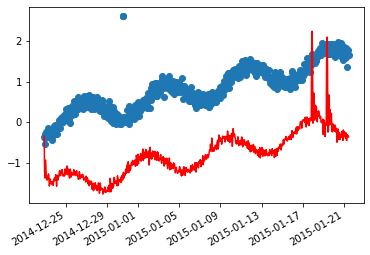

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
625 2014-12-19 08:00:00  19764.788448           1   2.742542      -0.027000
660 2014-12-20 19:00:00  19171.650587           1   2.610071      -0.248219
Precision:  1.0
Recall: 0.3333333333333333
F1: 0.5
--------------------
Mean: 993.259043, StandardDeviation: 1187.711162
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_45.csv
Test RMSE: 1.812


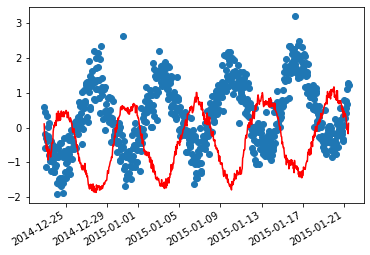

threshold:  1.2
Outliers:
              timestamp   value_data  is_anomaly  std_value  value_predict
494 2014-12-13 21:00:00  3438.621804           0   2.058887       0.630311
Precision:  0.0
truepositives + falsenegatives = 0
Mean: 556.168299, StandardDeviation: 1032.250432
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_75.csv
Test RMSE: 0.583


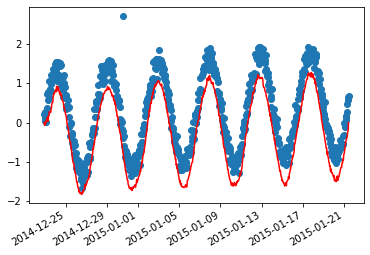

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 7759.722960, StandardDeviation: 4605.211318
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_76.csv
Test RMSE: 1.709


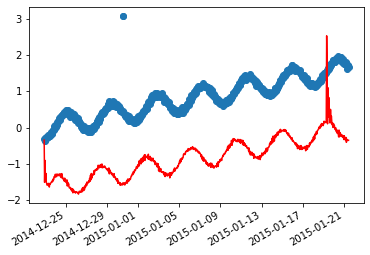

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  20933.121675           1   2.860542       1.643657
659 2014-12-20 18:00:00  20933.121675           1   2.860542       0.103541
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 26401.054954, StandardDeviation: 16295.078570
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_77.csv
Test RMSE: 1.639


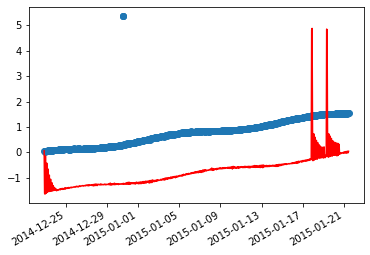

threshold:  1.2
Outliers:
              timestamp     value_data  is_anomaly  std_value  value_predict
624 2014-12-19 07:00:00  106623.213170           1   4.923091       0.894005
625 2014-12-19 08:00:00  106623.213170           1   4.923091      -0.328355
659 2014-12-20 18:00:00  106317.137007           1   4.904308       0.824035
660 2014-12-20 19:00:00  106317.137007           1   4.904308      -0.146072
Precision:  1.0
Recall: 0.6666666666666666
F1: 0.8
--------------------
Mean: 691.874740, StandardDeviation: 1044.758674
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_78.csv
Test RMSE: 0.697


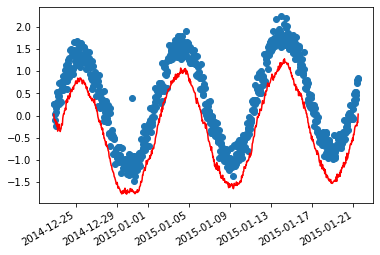

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
Mean: 15368.062661, StandardDeviation: 9186.095179
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_79.csv
Test RMSE: 1.687


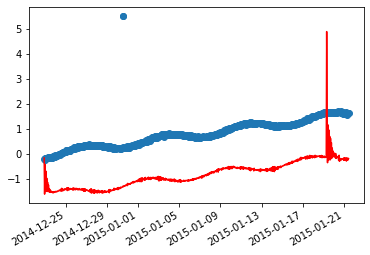

threshold:  1.2
Outliers:
              timestamp    value_data  is_anomaly  std_value  value_predict
658 2014-12-20 17:00:00  62523.840007           1   5.133387       1.431013
659 2014-12-20 18:00:00  62523.840007           1   5.133387      -0.332944
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 30 of 100
Mean: 68.708294, StandardDeviation: 984.090053
file: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_8.csv
Test RMSE: 0.144


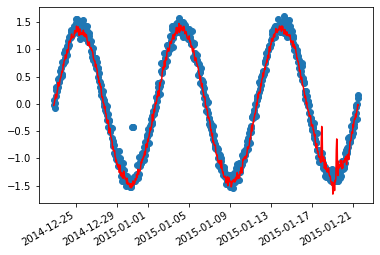

threshold:  1.2
Outliers:
Empty DataFrame
Columns: [timestamp, value_data, is_anomaly, std_value, value_predict]
Index: []
truepositives + falsepositives = 0
AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:0:01:28.760908
Average F1 score over 31 runs is = 0.8175438596491228


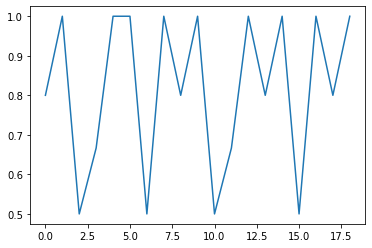

In [3]:
start_time = datetime.now() 
f1_plot = []
rmse_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 30:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
        
    # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    df['std_value'] = standardaized
    df_indexed['std_value'] = standardaized
    
     # split dataset
    X = df.std_value
    size = int(len(X)*0.5)
    train, test = X[0:size], X[size:len(X)]
    
    history = [x for x in train]
    predictions = list()
        
    for t in range(len(test)):
        # train autoregression
        model = AutoReg(history, lags=30)
        model_fit = model.fit()
        # make predictions
        output = model_fit.predict(start=len(history), end=len(history)+1, dynamic=False)
        yhat = output[0]
        predictions.append(yhat)
        obs = X.iloc[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))


    #calculate rmse
    error = sqrt(mean_squared_error(test, predictions))
    print(f'file: {file}')
    print('Test RMSE: %.3f' % error)
    rmse_plot.append(error)
    
    #plot results
    #plt.rcParams.update({'figure.figsize': (10,10)})
    plt.plot_date(df['timestamp'][size:],df['std_value'][size:])
    plt.plot_date(df['timestamp'][size:],predictions,color="red",fmt="-")
    plt.gcf().autofmt_xdate()
    plt.savefig("./ARoutput/" + fname +"ARLag30")
    plt.show()
    
    
    predictdf = pd.concat([df['timestamp'][:len(df)-1],pd.Series(predictions)], axis=1)
    predictdf.rename(columns={0:'value'},inplace=True)
    predictdf['value'] = predictdf['value'].shift(-2)
    predictdf = predictdf.dropna()
    predictdf = predictdf.set_index('timestamp')
    
    #combine with df_indexed with predictions to pick out the outliers.
    matrix = df.join(predictdf, on='timestamp',how='inner',lsuffix='_data',rsuffix='_predict')
    
    #manual threshold set
    threshold = 1.2
    
    #compare the real df value with the AR model and then 
    outliers = matrix[matrix.std_value > matrix.value_predict + threshold]
    #not_outliers = matrix[matrix.value_data <= matrix.value_predict + threshold]
    not_outliers = matrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'] #checkingmatrix[checkingmatrix.value_data <= checkingmatrix.value_prediction + manual_threshold]
    not_outliers = not_outliers.drop_duplicates()
    
    
    print("threshold: ", threshold)
    print("Outliers:")
    print(outliers)
    
#     p = len(series[series.is_anomaly == 1])
#     n = len(series[series.is_anomaly == 0])

    checkingmatrix = df.set_index('timestamp').join(outliers.set_index('timestamp'),on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truepositives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 1]
    falsepostives = checkingmatrix[checkingmatrix['is_anomaly_test'] == 0]
    
    checkingmatrix2 =df.set_index('timestamp').join(not_outliers.set_index('timestamp'),on='timestamp',how='inner',lsuffix='_test',rsuffix='_predict')
    truenegatives=checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 0]
    falsenegatives = checkingmatrix2[checkingmatrix2['is_anomaly_test'] == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    if(len(truepositives) + len(falsenegatives) > 0):
        recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
        print("Recall:", recall)
        recall_plot.append(recall)
    else:
        print("truepositives + falsenegatives = 0")
        continue   
    
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        f1_plot.append(0)
        continue
    print("--------------------")

    
end_time=datetime.now()
print(f"AR Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)
print(f"Average F1 score over {index} runs is = {sum(f1_plot)/len(f1_plot)}")

In [39]:
df = pd.read_csv(all_csv[0])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
df_indexed = df.set_index('timestamp')



X
 timestamp
2014-11-23 07:00:00     13.894031
2014-11-23 08:00:00     33.578274
2014-11-23 09:00:00     88.933746
2014-11-23 10:00:00    125.389424
2014-11-23 11:00:00    152.962000
                          ...    
2015-01-21 07:00:00   -141.419766
2015-01-21 08:00:00   -139.657834
2015-01-21 09:00:00    -70.550652
2015-01-21 10:00:00    -16.857148
2015-01-21 11:00:00      7.757660
Name: value, Length: 1421, dtype: float64

train
 timestamp
2014-11-23 07:00:00     13.894031
2014-11-23 08:00:00     33.578274
2014-11-23 09:00:00     88.933746
2014-11-23 10:00:00    125.389424
2014-11-23 11:00:00    152.962000
                          ...    
2014-12-22 16:00:00   -195.086545
2014-12-22 17:00:00   -149.992725
2014-12-22 18:00:00   -108.583818
2014-12-22 19:00:00    -72.091126
2014-12-22 20:00:00    -39.236624
Name: value, Length: 710, dtype: float64 
test
 timestamp
2014-12-22 21:00:00     -2.134421
2014-12-22 22:00:00     43.420277
2014-12-22 23:00:00     68.106669
2014-12-23 00:00:

predicted=-1367.536003, expected=-1364.996926
predicted=-1365.689454, expected=-1362.726522
predicted=-1368.529140, expected=-1378.040484
predicted=-1388.658450, expected=-1383.443732
predicted=-1379.409012, expected=-1386.221161
predicted=-1394.307382, expected=-1388.217813
predicted=-1387.523519, expected=-1398.435010
predicted=-1403.705267, expected=-1400.864272
predicted=-1393.654069, expected=-1406.583693
predicted=-1410.377205, expected=-1413.713271
predicted=-1402.680120, expected=-1413.383277
predicted=-1408.547205, expected=-1404.200049
predicted=-1394.814956, expected=-1400.759329
predicted=-1401.019052, expected=-1392.951745
predicted=-1384.420589, expected=587.893627
predicted=542.932900, expected=587.893627
predicted=-849.833233, expected=-1354.483291
predicted=-1362.672860, expected=-1359.037854
predicted=-873.100872, expected=-1351.458023
predicted=-1302.851836, expected=-1344.846787
predicted=-903.842363, expected=-1343.969385
predicted=-1218.800046, expected=-1328.7424

predicted=-1385.508781, expected=-1377.798118
predicted=-1353.999004, expected=-1359.842944
predicted=-1357.243483, expected=-1341.770752
predicted=-1326.185349, expected=-1320.425115
predicted=-1321.301568, expected=-1323.780473
predicted=-1315.923743, expected=-1328.674172
predicted=-1313.445423, expected=-1279.847094
predicted=-1255.959483, expected=-1290.120082
predicted=-1298.508118, expected=-1260.740615
predicted=-1220.177904, expected=-1246.434363
predicted=-1256.407918, expected=-1266.663554
predicted=-1229.541516, expected=-1208.811159
predicted=-1182.617141, expected=-1209.818075
predicted=-1205.775950, expected=-1198.721635
predicted=-1159.245070, expected=-1168.738302
predicted=-1151.396524, expected=-1147.895250
predicted=-1120.068030, expected=-1126.926321
predicted=-1107.571226, expected=-1106.459315
predicted=-1078.062607, expected=-1065.144691
predicted=-1042.257122, expected=-1046.402918
predicted=-1031.152066, expected=-1029.378257
predicted=-1001.744093, expected=-

predicted=-820.407458, expected=-820.125233
predicted=-833.180084, expected=-845.962936
predicted=-874.442437, expected=-888.030665
predicted=-907.652821, expected=-896.914576
predicted=-913.691629, expected=-950.087874
predicted=-984.266060, expected=-959.024074
predicted=-958.045277, expected=-991.120251
predicted=-1034.460585, expected=-1015.478763
predicted=-1015.703352, expected=-1020.567277
predicted=-1059.022111, expected=-1049.967147
predicted=-1068.457120, expected=-1062.121417
predicted=-1091.068701, expected=-1093.363626
predicted=-1120.113059, expected=-1125.377946
predicted=-1142.150681, expected=-1155.594605
predicted=-1170.984628, expected=-1166.918347
predicted=-1175.906648, expected=-1186.174269
predicted=-1207.059395, expected=-1211.586168
predicted=-1220.290983, expected=-1243.004571
predicted=-1255.712161, expected=-1236.000059
predicted=-1236.361178, expected=-1269.543116
predicted=-1297.786323, expected=-1290.020193
predicted=-1280.531534, expected=-1290.401105
pr

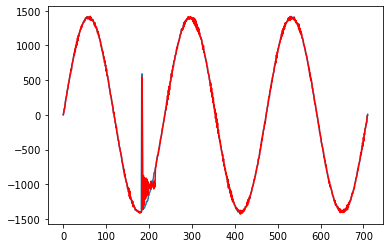

In [44]:
X = df_indexed.value
print("\n\nX\n",X)
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]
print("\ntrain\n",train,"\ntest\n",test)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # train autoregression
    model = AutoReg(history, lags=30)
    model_fit = model.fit()
    # make predictions
    output = model_fit.predict(start=len(history), end=len(history)+1, dynamic=False)
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig1 = plt.figure()
plt.plot(test.tolist())
plt.plot(predictions, color='red')
plt.show()
